In [9]:
include("utils.jl")

CI_τ_ub (generic function with 1 method)

In [6]:
df2 = data_generation2(1000; H = 1, K = 1)

1000×8 DataFrame
  Row │ G      S1     S0     D      Y1         Y0         S      Y         
      │ Bool   Int64  Int64  Bool   Float64    Float64    Int64  Float64   
──────┼────────────────────────────────────────────────────────────────────
    1 │  true      5      5   true  12.5509    11.5509        5  12.5509
    2 │  true     10     10  false  11.7558    10.7558       10  10.7558
    3 │ false      5     10  false  12.0454    11.0454       10  11.0454
    4 │ false      5     10   true   9.21895    8.21895       5   9.21895
    5 │  true     10     10   true   4.49865    3.49865      10   4.49865
    6 │  true      5      5  false   8.44724    7.44724       5   7.44724
    7 │ false      5      5  false   4.63093    3.63093       5   3.63093
    8 │ false     10     10   true   2.41919    1.41919      10   2.41919
    9 │  true      5     10   true   7.98029    6.98029       5   7.98029
   10 │  true      5     10   true   9.34075    8.34075       5   9.34075
   11 │ false      5     10  false   0.569533  -0.430467     10  -0.430467
  ⋮   │   ⋮      ⋮      ⋮      ⋮        ⋮          ⋮        ⋮        ⋮
  991 │  true     10     10  false  15.21      14.21         10  14.21
  992 │  true      5     10  false  14.7034    13.7034       10  13.7034
  993 │  true     10      5  false   7.20075    6.20075       5   6.20075
  994 │  true     10     10  false  15.5095    14.5095       10  14.5095
  995 │  true      5     10   true   7.85038    6.85038       5   7.85038
  996 │ false     10     10   true   7.61121    6.61121      10   7.61121
  997 │ false     10      5   true   4.16623    3.16623      10   4.16623
  998 │  true     10      5   true   1.24655    0.246551     10   1.24655
  999 │  true      5      5  false  -1.32574   -2.32574       5  -2.32574
 1000 │ false      5     10  false   9.54066    8.54066      10   8.54066
                                                           979 rows omitted

In [7]:
df2 = data_generation2(1000; K = 1.2, H = 1.2)

1000×8 DataFrame
  Row │ G      S1     S0     D      Y1          Y0         S      Y         
      │ Bool   Int64  Int64  Bool   Float64     Float64    Int64  Float64   
──────┼─────────────────────────────────────────────────────────────────────
    1 │  true     10      5   true   7.30661     6.30661      10   7.30661
    2 │ false     10      5  false  10.6104      9.61035       5   9.61035
    3 │ false     10      5  false  21.2829     20.2829        5  20.2829
    4 │  true     10     10   true  12.9371     11.9371       10  12.9371
    5 │ false     10      5  false  12.4838     11.4838        5  11.4838
    6 │ false     10     10   true  21.9206     20.9206       10  21.9206
    7 │ false      5      5  false   7.41062     6.41062       5   6.41062
    8 │ false     10     10  false   8.90035     7.90035      10   7.90035
    9 │ false      5      5  false  -0.756244   -1.75624       5  -1.75624
   10 │  true     10     10   true   5.7112      4.7112       10   5.7112
   11 │  true     10      5  false   0.214941   -0.785059      5  -0.785059
  ⋮   │   ⋮      ⋮      ⋮      ⋮        ⋮           ⋮        ⋮        ⋮
  991 │  true     10      5   true   1.32642     0.326418     10   1.32642
  992 │  true     10     10   true  15.3071     14.3071       10  15.3071
  993 │  true      5      5   true   4.65917     3.65917       5   4.65917
  994 │ false     10     10  false   9.44734     8.44734      10   8.44734
  995 │ false     10     10  false  11.9468     10.9468       10  10.9468
  996 │  true     10      5  false  -4.43105    -5.43105       5  -5.43105
  997 │  true     10      5  false   5.154       4.154         5   4.154
  998 │ false     10      5  false   0.0300513  -0.969949      5  -0.969949
  999 │  true     10      5  false   6.26128     5.26128       5   5.26128
 1000 │  true      5     10   true  14.5287     13.5287        5  14.5287
                                                            979 rows omitted

In [8]:
Ks = exp.(LinRange(0.0, 2, 10))
plot(Ks, [compute_upper_Y1(df2; K = K, H = 1.2) - compute_lower_Y0(df2; K = K, H = 1.2) for K in Ks], xlim = (1, 6), label = "upper bound", lw = 3, linestyle = :dashdot)
plot!(Ks, [compute_lower_Y1(df2; K = K, H = 1.2) - compute_upper_Y0(df2; K = K, H = 1.2) for K in Ks], xlim = (1, 6), label = "lower bound", lw = 3, linestyle = :dashdot)
plot!(Ks, [compute_lower_Y1(df2; K = 1, H = 1) - compute_upper_Y0(df2; K = 1, H = 1) for K in Ks], label = "ACI est.", lw = 3, linestyle = :dashdot)
plot!(leg = :right, xtickfontsize = 18, ytickfontsize = 18, xguidefontsize = 18, yguidefontsize = 18, legendfontsize = 18)
hline!([1], label = "True ATE", lw = 3)
# plot!(title = L"One realization for $\tau$ : true $H = 1.2, K = 1.2$ with $K$ varied$")
plot!(xlabel = L"$K$", ylabel = "estimate")
plot!(size = (800, 800))
savefig("fig1.png")

In [19]:
mean(df2.G)

0.52

In [13]:
using Random
Random.seed!(3)

MersenneTwister(3)

In [22]:
sp = 1.2
upper_bound_τ = []
oracle_τ = []
lower_bound_τ = []

for _ in 1:2000
    df2 = data_generation2(500; K = sp, H = sp)
    push!(upper_bound_τ, compute_upper_Y1(df2; K = sp, H = sp) - compute_lower_Y0(df2; K = sp, H = sp))
    push!(lower_bound_τ, compute_lower_Y1(df2; K = sp, H = sp) - compute_upper_Y0(df2; K = sp, H = sp))
    push!(oracle_τ, mean(df2[df2.G.==0, :Y1] - df2[df2.G.==0, :Y0]))
end

sigma_l = std(lower_bound_τ)
sigma_h = std(upper_bound_τ)

println("n = 500")
println(L"\tau^-", mean(lower_bound_τ))
println(L"Std. Dev. of $\tau$", sigma_l)
println(L"\tau^+", mean(upper_bound_τ))
println(L"Std. Dev. of $\tau$", sigma_h)
println("coverage", mean(upper_bound_τ .+ 1.96 * sigma_h .> 1 .> lower_bound_τ .- 1.96 * sigma_l))

n = 500
$\tau^-$0.7270555968868841
Std. Dev. of $\tau$0.7433005541922757
$\tau^+$2.00339992090197
Std. Dev. of $\tau$0.7442306292498936
coverage0.994


In [26]:
sp = 1.2
upper_bound_τ = []
oracle_τ = []
lower_bound_τ = []

for _ in 1:2000
    df2 = data_generation2(1000; K = sp, H = sp)
    push!(upper_bound_τ, compute_upper_Y1(df2; K = sp, H = sp) - compute_lower_Y0(df2; K = sp, H = sp))
    push!(lower_bound_τ, compute_lower_Y1(df2; K = sp, H = sp) - compute_upper_Y0(df2; K = sp, H = sp))
    push!(oracle_τ, mean(df2[df2.G.==0, :Y1] - df2[df2.G.==0, :Y0]))
end


sigma_l = std(lower_bound_τ)
sigma_h = std(upper_bound_τ)

println("n = 1000")
println(L"\tau^-", mean(lower_bound_τ))
println(L"Std. Dev. of $\tau$", sigma_l)
println(L"\tau^-", mean(upper_bound_τ))
println(L"Std. Dev. of $\tau$", sigma_h)
println("coverage", mean(upper_bound_τ .+ 1.96 * sigma_h .> 1 .> lower_bound_τ .- 1.96 * sigma_l))

n = 1000
$\tau^-$0.7975874369603996
Std. Dev. of $\tau$0.505659288339231
$\tau^-$2.0622392296907393
Std. Dev. of $\tau$0.5088518126043838
coverage0.988


In [41]:
sp = 1.2
upper_bound_τ = []
oracle_τ = []
lower_bound_τ = []

for _ in 1:2000
    df2 = data_generation2(2000; K = sp, H = sp)
    push!(upper_bound_τ, compute_upper_Y1(df2; K = sp, H = sp) - compute_lower_Y0(df2; K = sp, H = sp))
    push!(lower_bound_τ, compute_lower_Y1(df2; K = sp, H = sp) - compute_upper_Y0(df2; K = sp, H = sp))
    push!(oracle_τ, mean(df2[df2.G.==0, :Y1] - df2[df2.G.==0, :Y0]))
end

histogram(upper_bound_τ, bins = 50, alpha = 0.1, label = "upper bound")
histogram!(lower_bound_τ, bins = 50, alpha = 0.1, label = "lower bound")
vline!([1], label = "true τ")
plot!(xlabel = "estimate", ylabel = "freq", size = (800, 800))
plot!(leg = :best, xtickfontsize = 18, ytickfontsize = 18, xguidefontsize = 18, yguidefontsize = 18, legendfontsize = 18)
savefig("fig2.png")

sigma_l = std(lower_bound_τ)
sigma_h = std(upper_bound_τ)

println("n = 2000")
println(L"\tau^-", mean(lower_bound_τ))
println(L"Std. Dev. of $\tau$", sigma_l)
println(L"\tau^-", mean(upper_bound_τ))
println(L"Std. Dev. of $\tau$", sigma_h)
println("coverage", mean(upper_bound_τ .+ 1.96 * sigma_h .> 1 .> lower_bound_τ .- 1.96 * sigma_l))

n = 2000
$\tau^-$0.7347039385131018
Std. Dev. of $\tau$0.3714857268417802
$\tau^-$1.9867859428540515
Std. Dev. of $\tau$0.3710935932566127
coverage0.996


In [23]:
sp = 1
upper_bound_τ = []
oracle_τ = []
lower_bound_τ = []

for _ in 1:2000
    df2 = data_generation2(500; K = sp, H = sp)
    push!(upper_bound_τ, compute_upper_Y1(df2; K = sp, H = sp) - compute_lower_Y0(df2; K = sp, H = sp))
    push!(lower_bound_τ, compute_lower_Y1(df2; K = sp, H = sp) - compute_upper_Y0(df2; K = sp, H = sp))
    push!(oracle_τ, mean(df2[df2.G.==0, :Y1] - df2[df2.G.==0, :Y0]))
end


sigma_l = std(lower_bound_τ)
sigma_h = std(upper_bound_τ)

println("n = 500")
println(L"\tau^-", mean(lower_bound_τ))
println(L"Std. Dev. of $\tau$", sigma_l)
println(L"\tau^-", mean(upper_bound_τ))
println(L"Std. Dev. of $\tau$", sigma_h)
println("coverage", mean(upper_bound_τ .+ 1.96 * sigma_h .> 1 .> lower_bound_τ .- 1.96 * sigma_l))

n = 2000
$\tau^-$1.0380950118065349
Std. Dev. of $\tau$0.7318399092243633
$\tau^-$1.0380950118065349
Std. Dev. of $\tau$0.7318399092243633
coverage0.9485


In [24]:
sp = 1
upper_bound_τ = []
oracle_τ = []
lower_bound_τ = []

for _ in 1:2000
    df2 = data_generation2(1000; K = sp, H = sp)
    push!(upper_bound_τ, compute_upper_Y1(df2; K = sp, H = sp) - compute_lower_Y0(df2; K = sp, H = sp))
    push!(lower_bound_τ, compute_lower_Y1(df2; K = sp, H = sp) - compute_upper_Y0(df2; K = sp, H = sp))
    push!(oracle_τ, mean(df2[df2.G.==0, :Y1] - df2[df2.G.==0, :Y0]))
end


sigma_l = std(lower_bound_τ)
sigma_h = std(upper_bound_τ)

println("n = 1000")
println(L"\tau^-", mean(lower_bound_τ))
println(L"Std. Dev. of $\tau$", sigma_l)
println(L"\tau^-", mean(upper_bound_τ))
println(L"Std. Dev. of $\tau$", sigma_h)
println("coverage", mean(upper_bound_τ .+ 1.96 * sigma_h .> 1 .> lower_bound_τ .- 1.96 * sigma_l))

n = 1000
$\tau^-$1.0390572634113282
Std. Dev. of $\tau$0.49570496103718037
$\tau^-$1.0390572634113282
Std. Dev. of $\tau$0.49570496103718037
coverage0.9455


In [25]:
sp = 1
upper_bound_τ = []
oracle_τ = []
lower_bound_τ = []

for _ in 1:2000
    df2 = data_generation2(2000; K = sp, H = sp)
    push!(upper_bound_τ, compute_upper_Y1(df2; K = sp, H = sp) - compute_lower_Y0(df2; K = sp, H = sp))
    push!(lower_bound_τ, compute_lower_Y1(df2; K = sp, H = sp) - compute_upper_Y0(df2; K = sp, H = sp))
    push!(oracle_τ, mean(df2[df2.G.==0, :Y1] - df2[df2.G.==0, :Y0]))
end

sigma_l = std(lower_bound_τ)
sigma_h = std(upper_bound_τ)

println("n = 2000")
println(L"\tau^-", mean(lower_bound_τ))
println(L"Std. Dev. of $\tau$", sigma_l)
println(L"\tau^-", mean(upper_bound_τ))
println(L"Std. Dev. of $\tau$", sigma_h)
println("coverage", mean(upper_bound_τ .+ 1.96 * sigma_h .> 1 .> lower_bound_τ .- 1.96 * sigma_l))

n = 2000
$\tau^-$1.0290152371886407
Std. Dev. of $\tau$0.3569225372080426
$\tau^-$1.0290152371886407
Std. Dev. of $\tau$0.3569225372080426
coverage0.947


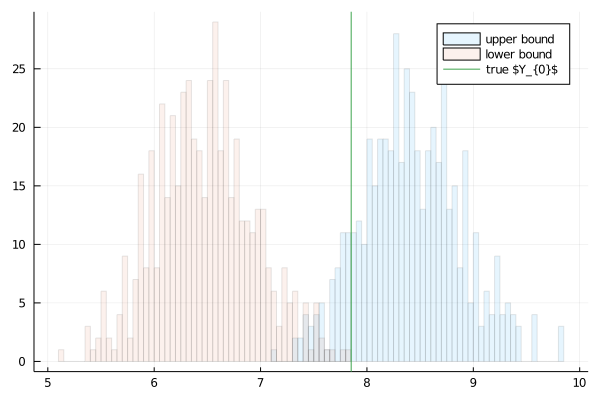

In [16]:
upper_bound_Y0 = []
oracle_Y0 = []
lower_bound_Y0 = []

for i in 1:500
    df2 = data_generation2(800; K = 1.5, H = 1.5)
    push!(upper_bound_Y0, compute_upper_Y0(df2; K = 1.5, H = 1.5))
    push!(lower_bound_Y0, compute_lower_Y0(df2; K = 1.5, H = 1.5))
    push!(oracle_Y0, mean(df2[df2.G.==0, :Y0]))
end

histogram(upper_bound_Y0, bins = 50, alpha = 0.1, label = "upper bound")
histogram!(lower_bound_Y0, bins = 50, alpha = 0.1, label = "lower bound")
vline!([mean(oracle_Y0)], label = L"true $Y_{0}$")

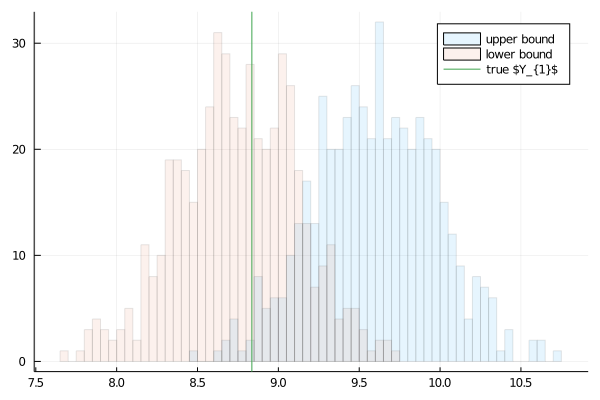

In [17]:
upper_bound_Y1 = []
oracle_Y1 = []
lower_bound_Y1 = []

for i in 1:500
    df2 = data_generation2(800; K = 1.5, H = 1.5)
    push!(upper_bound_Y1, compute_upper_Y1(df2; K = 1.5, H = 1.5))
    push!(lower_bound_Y1, compute_lower_Y1(df2; K = 1.5, H = 1.5))
    push!(oracle_Y1, mean(df2[df2.G.==0, :Y1]))
end

histogram(upper_bound_Y1, bins = 50, alpha = 0.1, label = "upper bound")
histogram!(lower_bound_Y1, bins = 50, alpha = 0.1, label = "lower bound")
vline!([mean(oracle_Y1)], label = L"true $Y_{1}$")

## Confidence Interval

In [ ]:
# See utils.jl for code

## Simulation Results

In [66]:
using Random
Random.seed!(3)

MersenneTwister(3)

In [68]:
Sim = 2000

2000

In [69]:
round3(x) = round.(x, digits = 3)
round3(1.2321)

1.232

In [70]:
# Table 1
T1 = DataFrame(n=Int[], τ=Float64[], σ=Float64[], Std_τ = Float64[], Coverage=Float64[])

0×5 DataFrame

In [71]:
sp = 1
lower_bound_τ = []
lower_bound_std_err_τ = []
upper_bound_τ = []
upper_bound_std_err_τ = []

counter = 1
for _ in 1:Sim
    df2 = data_generation2(500; K=sp, H=sp)
    try
        lower_est, lower_std_err = CI_τ_lb(df2; K=sp + 0.01, H=sp + 0.01)
        push!(lower_bound_τ, lower_est)
        push!(lower_bound_std_err_τ, lower_std_err)

        upper_est, upper_std_err = CI_τ_ub(df2; K=sp + 0.01, H=sp + 0.01)
        push!(upper_bound_τ, upper_est)
        push!(upper_bound_std_err_τ, upper_std_err)
    catch
        println("Fails")
    end

    counter = counter + 1
    if counter % 400 == 0
        println("Current simulation: #$counter")
    end
end

sigma_l = std(lower_bound_τ)
sigma_h = std(upper_bound_τ)

println("n = 500")
println(L"\tau^-: ", mean(lower_bound_τ))
println(L"\sigma^-: ", mean(lower_bound_std_err_τ))
println(L"Std. Dev. of $\tau$: ", sigma_l)
println(L"\tau^+ : ", mean(upper_bound_τ))
println(L"\sigma^+ :", mean(upper_bound_std_err_τ))
println(L"Std. Dev. of $\tau$ :", sigma_h)
coverage = mean((upper_bound_τ .+ 1.96 * upper_bound_std_err_τ .> mean(upper_bound_τ)) .* (mean(lower_bound_τ) .> lower_bound_τ .- 1.96 * lower_bound_std_err_τ))
println("coverage: ", coverage)

push!(T1, [500, (round3 ∘ mean)(lower_bound_τ), (round3 ∘ mean)(lower_bound_std_err_τ), (round3 ∘ mean)(sigma_l), (round3 ∘ mean)(coverage)])

Current simulation: #400
Current simulation: #800
Current simulation: #1200
Current simulation: #1600
Current simulation: #2000
n = 500
$\tau^-: $0.9673005581445396
$\sigma^-: $0.7249683997166357
Std. Dev. of $\tau$: 0.718981917386447
$\tau^+ : $1.0372160698738389
$\sigma^+ :$0.725058490935866
Std. Dev. of $\tau$ :0.719031183531238
coverage: 0.9515


1×5 DataFrame
 Row │ n      τ        σ        Std_τ    Coverage 
     │ Int64  Float64  Float64  Float64  Float64  
─────┼────────────────────────────────────────────
   1 │   500    0.967    0.725    0.719     0.952

In [72]:
sp = 1
lower_bound_τ = []
lower_bound_std_err_τ = []
upper_bound_τ = []
upper_bound_std_err_τ = []

for _ in 1:Sim
    df2 = data_generation2(1000; K=sp, H=sp)
    try
        lower_est, lower_std_err = CI_τ_lb(df2; K=sp + 0.01, H=sp + 0.01)
        push!(lower_bound_τ, lower_est)
        push!(lower_bound_std_err_τ, lower_std_err)

        upper_est, upper_std_err = CI_τ_ub(df2; K=sp + 0.01, H=sp + 0.01)
        push!(upper_bound_τ, upper_est)
        push!(upper_bound_std_err_τ, upper_std_err)
    catch
        println("Fails")
    end
end

sigma_l = std(lower_bound_τ)
sigma_h = std(upper_bound_τ)

println("n = 1000")
println(L"\tau^-: ", mean(lower_bound_τ))
println(L"\sigma^-: ", mean(lower_bound_std_err_τ))
println(L"Std. Dev. of $\tau$: ", sigma_l)
println(L"\tau^+ : ", mean(upper_bound_τ))
println(L"\sigma^+ :", mean(upper_bound_std_err_τ))
println(L"Std. Dev. of $\tau$ :", sigma_h)
coverage = mean((upper_bound_τ .+ 1.96 * upper_bound_std_err_τ .> mean(upper_bound_τ)) .* (mean(lower_bound_τ) .> lower_bound_τ .- 1.96 * lower_bound_std_err_τ))
println("coverage: ", coverage)

push!(T1, [1000, (round3 ∘ mean)(lower_bound_τ), (round3 ∘ mean)(lower_bound_std_err_τ), (round3 ∘ mean)(sigma_l), (round3 ∘ mean)(coverage)])

n = 1000
$\tau^-: $0.9961987958056809
$\sigma^-: $0.5119570626899709
Std. Dev. of $\tau$: 0.49930545255866904
$\tau^+ : $1.0655289607771452
$\sigma^+ :$0.5119935455428605
Std. Dev. of $\tau$ :0.49942791298111616
coverage: 0.9595


2×5 DataFrame
 Row │ n      τ        σ        Std_τ    Coverage 
     │ Int64  Float64  Float64  Float64  Float64  
─────┼────────────────────────────────────────────
   1 │   500    0.967    0.725    0.719     0.952
   2 │  1000    0.996    0.512    0.499     0.96

In [73]:
sp = 1
lower_bound_τ = []
lower_bound_std_err_τ = []
upper_bound_τ = []
upper_bound_std_err_τ = []

for _ in 1:Sim
    df2 = data_generation2(2000; K=sp, H=sp)
    try
        lower_est, lower_std_err = CI_τ_lb(df2; K=sp + 0.01, H=sp + 0.01)
        push!(lower_bound_τ, lower_est)
        push!(lower_bound_std_err_τ, lower_std_err)

        upper_est, upper_std_err = CI_τ_ub(df2; K=sp + 0.01, H=sp + 0.01)
        push!(upper_bound_τ, upper_est)
        push!(upper_bound_std_err_τ, upper_std_err)
    catch
        println("Fails")
    end
end

sigma_l = std(lower_bound_τ)
sigma_h = std(upper_bound_τ)

println("n = 2000")
println(L"\tau^-: ", mean(lower_bound_τ))
println(L"\sigma^-: ", mean(lower_bound_std_err_τ))
println(L"Std. Dev. of $\tau$: ", sigma_l)
println(L"\tau^+ : ", mean(upper_bound_τ))
println(L"\sigma^+ :", mean(upper_bound_std_err_τ))
println(L"Std. Dev. of $\tau$ :", sigma_h)
coverage = mean((upper_bound_τ .+ 1.96 * upper_bound_std_err_τ .> mean(upper_bound_τ)) .* (mean(lower_bound_τ) .> lower_bound_τ .- 1.96 * lower_bound_std_err_τ))
println("coverage: ", coverage)

push!(T1, [2000, (round3 ∘ mean)(lower_bound_τ), (round3 ∘ mean)(lower_bound_std_err_τ), (round3 ∘ mean)(sigma_l), (round3 ∘ mean)(coverage)])

n = 2000
$\tau^-: $0.9904482402561318
$\sigma^-: $0.36154822882168014
Std. Dev. of $\tau$: 0.3539870359323268
$\tau^+ : $1.0592047545796026
$\sigma^+ :$0.3615726881321581
Std. Dev. of $\tau$ :0.3540170500295217
coverage: 0.9605


3×5 DataFrame
 Row │ n      τ        σ        Std_τ    Coverage 
     │ Int64  Float64  Float64  Float64  Float64  
─────┼────────────────────────────────────────────
   1 │   500    0.967    0.725    0.719     0.952
   2 │  1000    0.996    0.512    0.499     0.96
   3 │  2000    0.99     0.362    0.354     0.96

In [74]:
@show T1

T1 = 3×5 DataFrame
 Row │ n      τ        σ        Std_τ    Coverage
     │ Int64  Float64  Float64  Float64  Float64
─────┼────────────────────────────────────────────
   1 │   500    0.967    0.725    0.719     0.952
   2 │  1000    0.996    0.512    0.499     0.96
   3 │  2000    0.99     0.362    0.354     0.96


3×5 DataFrame
 Row │ n      τ        σ        Std_τ    Coverage 
     │ Int64  Float64  Float64  Float64  Float64  
─────┼────────────────────────────────────────────
   1 │   500    0.967    0.725    0.719     0.952
   2 │  1000    0.996    0.512    0.499     0.96
   3 │  2000    0.99     0.362    0.354     0.96

In [75]:
### table1.jl script
T = T1

# Generate table header
Table = "\\begin{tabular}{| " * "c |"^(ncol(T) + 1) * "}\n";
Table *= "    \\hline\n";
Table *= "    % Table header\n";
Table *= raw""" $\mathrm{n}$ & $\widehat{\tau}^{-}(\widehat{\tau}^{+})$ & $\widehat{\sigma}^{-}(\widehat{\sigma}^{+})$ & \text {Std. dev. of } $\widehat{\tau}^{-}(\widehat{\tau}^{+})$ & \text {Coverage }""";
Table *= " \\\\\n";

# Generate table body (with nice alternating row colours)
Table *= "    % Table body\n";
Table *= "  \\hline\n";
for row in 1:nrow(T)
  for col in 1:ncol(T)
    val = T[row, col]
    if col > 1
      Table *= " & " * string(round(val, digits=3))
    else
      Table *= string(val)
    end
  end
  Table *= " \\\\\n"
end
Table *= "  \\hline\n"
Table *= "\\end{tabular}\n";

# Export result to .tex file
write("table1.tex", Table);

In [76]:
# Table 2
T2 = DataFrame(n=Int[], τminus=Float64[], σminus=Float64[], Std_τminus=Float64[], τplus=Float64[], σplus=Float64[], Std_τplus=Float64[], Coverage=Float64[])

0×8 DataFrame

In [77]:
sp = 1.2
lower_bound_τ = []
lower_bound_std_err_τ = []
upper_bound_τ = []
upper_bound_std_err_τ = []

for _ in 1:Sim
    df2 = data_generation2(500; K=sp, H=sp)
    try
        lower_est, lower_std_err = CI_τ_lb(df2; K=sp, H=sp)
        push!(lower_bound_τ, lower_est)
        push!(lower_bound_std_err_τ, lower_std_err)

        upper_est, upper_std_err = CI_τ_ub(df2; K=sp, H=sp)
        push!(upper_bound_τ, upper_est)
        push!(upper_bound_std_err_τ, upper_std_err)
    catch
        println("Fails")
    end
end

sigma_l = std(lower_bound_τ)
sigma_h = std(upper_bound_τ)

println("n = 500")
println(L"\tau^-: ", mean(lower_bound_τ))
println(L"\sigma^-: ", mean(lower_bound_std_err_τ))
println(L"Std. Dev. of $\tau$: ", sigma_l)
println(L"\tau^+ : ", mean(upper_bound_τ))
println(L"\sigma^+ :", mean(upper_bound_std_err_τ))
println(L"Std. Dev. of $\tau$ :", sigma_h)
coverage = mean((upper_bound_τ .+ 1.96 * upper_bound_std_err_τ .> mean(upper_bound_τ)) .* (mean(lower_bound_τ) .> lower_bound_τ .- 1.96 * lower_bound_std_err_τ))
println("coverage: ", coverage)

push!(T2, [500, (round3 ∘ mean)(lower_bound_τ), (round3 ∘ mean)(lower_bound_std_err_τ), (round3 ∘ mean)(sigma_l), (round3 ∘ mean)(upper_bound_τ), (round3 ∘ mean)(upper_bound_std_err_τ), (round3 ∘ mean)(sigma_h), (round3 ∘ mean)(coverage)])

n = 500
$\tau^-: $0.7215717112458155
$\sigma^-: $0.7439273272772711
Std. Dev. of $\tau$: 0.7396390257237171
$\tau^+ : $1.9989077628971554
$\sigma^+ :$0.7440510500952585
Std. Dev. of $\tau$ :0.7412682385787996
coverage: 0.949


1×8 DataFrame
 Row │ n      τminus   σminus   Std_τminus  τplus    σplus    Std_τplus  Cover ⋯
     │ Int64  Float64  Float64  Float64     Float64  Float64  Float64    Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   500    0.722    0.744        0.74    1.999    0.744      0.741     0. ⋯
                                                                1 column omitted

In [78]:
sp = 1.2
lower_bound_τ = []
lower_bound_std_err_τ = []
upper_bound_τ = []
upper_bound_std_err_τ = []

for _ in 1:Sim
    df2 = data_generation2(1000; K=sp, H=sp)
    try
        lower_est, lower_std_err = CI_τ_lb(df2; K=sp, H=sp)
        push!(lower_bound_τ, lower_est)
        push!(lower_bound_std_err_τ, lower_std_err)

        upper_est, upper_std_err = CI_τ_ub(df2; K=sp, H=sp)
        push!(upper_bound_τ, upper_est)
        push!(upper_bound_std_err_τ, upper_std_err)
    catch
        println("Fails")
    end
end

sigma_l = std(lower_bound_τ)
sigma_h = std(upper_bound_τ)

println("n = 1000")
println(L"\tau^-: ", mean(lower_bound_τ))
println(L"\sigma^-: ", mean(lower_bound_std_err_τ))
println(L"Std. Dev. of $\tau$: ", sigma_l)
println(L"\tau^+ : ", mean(upper_bound_τ))
println(L"\sigma^+ :", mean(upper_bound_std_err_τ))
println(L"Std. Dev. of $\tau$ :", sigma_h)
coverage = mean((upper_bound_τ .+ 1.96 * upper_bound_std_err_τ .> mean(upper_bound_τ)) .* (mean(lower_bound_τ) .> lower_bound_τ .- 1.96 * lower_bound_std_err_τ))
println("coverage: ", coverage)

push!(T2, [1000, (round3 ∘ mean)(lower_bound_τ), (round3 ∘ mean)(lower_bound_std_err_τ), (round3 ∘ mean)(sigma_l), (round3 ∘ mean)(upper_bound_τ), (round3 ∘ mean)(upper_bound_std_err_τ), (round3 ∘ mean)(sigma_h), (round3 ∘ mean)(coverage)])

n = 1000
$\tau^-: $0.7243369720062026
$\sigma^-: $0.5253319921979632
Std. Dev. of $\tau$: 0.52428268834484
$\tau^+ : $1.9887513597010276
$\sigma^+ :$0.525079712954418
Std. Dev. of $\tau$ :0.5247017419489988
coverage: 0.9515


2×8 DataFrame
 Row │ n      τminus   σminus   Std_τminus  τplus    σplus    Std_τplus  Cover ⋯
     │ Int64  Float64  Float64  Float64     Float64  Float64  Float64    Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   500    0.722    0.744       0.74     1.999    0.744      0.741     0. ⋯
   2 │  1000    0.724    0.525       0.524    1.989    0.525      0.525     0.
                                                                1 column omitted

In [79]:
sp = 1.2
lower_bound_τ = []
lower_bound_std_err_τ = []
upper_bound_τ = []
upper_bound_std_err_τ = []

for _ in 1:Sim
    df2 = data_generation2(2000; K=sp, H=sp)
    try
        lower_est, lower_std_err = CI_τ_lb(df2; K=sp, H=sp)
        push!(lower_bound_τ, lower_est)
        push!(lower_bound_std_err_τ, lower_std_err)

        upper_est, upper_std_err = CI_τ_ub(df2; K=sp, H=sp)
        push!(upper_bound_τ, upper_est)
        push!(upper_bound_std_err_τ, upper_std_err)
    catch
        println("Fails")
    end
end

sigma_l = std(lower_bound_τ)
sigma_h = std(upper_bound_τ)

println("n = 2000")
println(L"\tau^-: ", mean(lower_bound_τ))
println(L"\sigma^-: ", mean(lower_bound_std_err_τ))
println(L"Std. Dev. of $\tau$: ", sigma_l)
println(L"\tau^+ : ", mean(upper_bound_τ))
println(L"\sigma^+ :", mean(upper_bound_std_err_τ))
println(L"Std. Dev. of $\tau$ :", sigma_h)
coverage = mean((upper_bound_τ .+ 1.96 * upper_bound_std_err_τ .> mean(upper_bound_τ)) .* (mean(lower_bound_τ) .> lower_bound_τ .- 1.96 * lower_bound_std_err_τ))
println("coverage: ", coverage)

push!(T2, [2000, (round3 ∘ mean)(lower_bound_τ), (round3 ∘ mean)(lower_bound_std_err_τ), (round3 ∘ mean)(sigma_l), (round3 ∘ mean)(upper_bound_τ), (round3 ∘ mean)(upper_bound_std_err_τ), (round3 ∘ mean)(sigma_h), (round3 ∘ mean)(coverage)])

n = 2000
$\tau^-: $0.7312303372782017
$\sigma^-: $0.37033876168635343
Std. Dev. of $\tau$: 0.36205736685750345
$\tau^+ : $1.9831266169840946
$\sigma^+ :$0.37024854098130777
Std. Dev. of $\tau$ :0.3618936732848319
coverage: 0.9545


3×8 DataFrame
 Row │ n      τminus   σminus   Std_τminus  τplus    σplus    Std_τplus  Cover ⋯
     │ Int64  Float64  Float64  Float64     Float64  Float64  Float64    Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   500    0.722    0.744       0.74     1.999    0.744      0.741     0. ⋯
   2 │  1000    0.724    0.525       0.524    1.989    0.525      0.525     0.
   3 │  2000    0.731    0.37        0.362    1.983    0.37       0.362     0.
                                                                1 column omitted

In [80]:
### table2.jl script
T = T2

# Generate table header
Table = "\\begin{tabular}{| " * "c |"^(ncol(T) + 1) * "}\n";
Table *= "    \\hline\n";
Table *= "    % Table header\n";
Table *= raw""" $\mathrm{n}$ & $\widehat{\tau}^{-}$ & $\widehat{\sigma}^{-}$ & \text {Std. dev. of } $\widehat{\tau}^{-}$ & $\widehat{\tau}^{+}$ & $\widehat{\sigma}^{+}$ & \text {Std. dev. of } $\widehat{\tau}^{+}$ & \text {Coverage }""";
Table *= " \\\\\n";

# Generate table body (with nice alternating row colours)
Table *= "    % Table body\n";
Table *= "  \\hline\n";
for row in 1:nrow(T)
  for col in 1:ncol(T)
    val = T[row, col]
    if col > 1
      Table *= " & " * string(round(val, digits=3))
    else
      Table *= string(val)
    end
  end
  Table *= " \\\\\n"
end
Table *= "  \\hline\n"
Table *= "\\end{tabular}\n";

# Export result to .tex file
write("table2.tex", Table);